In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
import string
from nltk.tokenize import word_tokenize
import re
%matplotlib inline

In [2]:
from nltk.corpus import inaugural

In [3]:
eisenhower = inaugural.raw('1953-Eisenhower.txt')
kennedy = inaugural.raw('1961-Kennedy.txt')
johnson = inaugural.raw('1965-Johnson.txt')
nixon = inaugural.raw('1969-Nixon.txt')
carter = inaugural.raw('1977-Carter.txt')
reagan = inaugural.raw('1981-Reagan.txt')
bush = inaugural.raw('1989-Bush.txt')
clinton = inaugural.raw('1993-Clinton.txt')
w_bush = inaugural.raw('2001-Bush.txt')
obama = inaugural.raw('2009-Obama.txt')

texts = [eisenhower, kennedy, johnson, nixon, carter, reagan, bush, clinton, w_bush, obama]
presidents = ['Eisenhower', 'Kennedy', 'Johnson', 'Nixon', 'Carter', 'Reagan', 'Bush', 'Clinton', 'W_Bush', 'Obama']
inaugural_speeches = ['1953-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1989-Bush.txt', '1993-Clinton.txt', '2001-Bush.txt', '2009-Obama.txt']


In [4]:
# Utility function for standard text cleaning.
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = ' '.join(text.split())
    return text

In [5]:
d={}
i = 0
for x in presidents:
    d['{}'.format(x)] = text_cleaner(texts[i])
    i += 1

In [6]:
nlp = spacy.load('en')

for k, v in d.items():
    d[k] = nlp(v)

In [7]:
print(d.keys())

dict_keys(['Eisenhower', 'Kennedy', 'Johnson', 'Nixon', 'Carter', 'Reagan', 'Bush', 'Clinton', 'W_Bush', 'Obama'])


In [8]:
for k, v in d.items():
    d[k] = [[sent, k] for sent in v.sents]

In [9]:
eisenhower = d['Eisenhower']
kennedy = d['Kennedy']
johnson = d['Johnson']
nixon = d['Nixon']
carter = d['Carter']
reagan = d['Reagan']
bush = d['Bush']
clinton = d['Clinton']
w_bush = d['W_Bush']
obama = d['Obama']

In [10]:
sentences = pd.DataFrame(eisenhower+kennedy+johnson+nixon+carter+reagan+bush+clinton+w_bush+obama)

In [11]:
# Convert sentences tuples to string
sentences[0] = sentences[0].astype(str)

# Tokenize sentences
sentences[0] = sentences.apply(lambda row: nltk.word_tokenize(row[0]), axis=1)

# Remove all stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
sentences[0] = sentences[0].apply(lambda x: [item for item in x if item not in stop])

# Lower Case everything
sentences[0] = sentences[0].astype(str)
sentences[0] = sentences[0].apply(lambda x: x.lower())

# remove all punctuations
from string import punctuation
sentences[0] = sentences[0].apply(lambda x: ''.join(c for c in x if c not in punctuation))

In [12]:
sentences = sentences.rename(index=str, columns={0:'Sentence', 1:'President'})

In [13]:
sentences.head()

,Sentence,President
0,my friends i begin expression thoughts i deem...,Eisenhower
1,and i ask bow heads,Eisenhower
2,almighty god stand moment future associates e...,Eisenhower
3,give us pray power discern clearly right wro...,Eisenhower
4,especially pray concern shall people regardles...,Eisenhower


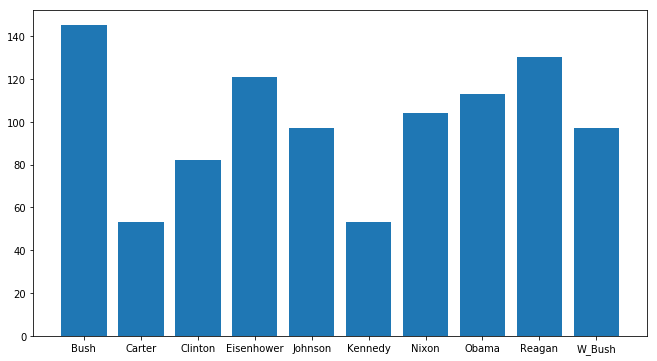

In [14]:
sentence_count = sentences.groupby('President').count()

plt.figure(figsize=(11,6))
plt.bar(sentence_count.index, sentence_count['Sentence'])
plt.show()

In [15]:
d.keys()

dict_keys(['Eisenhower', 'Kennedy', 'Johnson', 'Nixon', 'Carter', 'Reagan', 'Bush', 'Clinton', 'W_Bush', 'Obama'])

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sentences['president_number'] = sentences['President']
sentences['president_number'] = le.fit_transform(sentences['president_number'])

In [24]:
sentences.head()

,Sentence,President,president_number
0,my friends i begin expression thoughts i deem...,Eisenhower,3
1,and i ask bow heads,Eisenhower,3
2,almighty god stand moment future associates e...,Eisenhower,3
3,give us pray power discern clearly right wro...,Eisenhower,3
4,especially pray concern shall people regardles...,Eisenhower,3


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(sentences['Sentence']).toarray()
labels = sentences.president_number
features.shape

(995, 352)

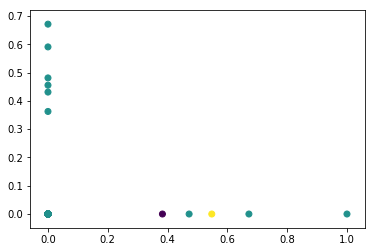

In [30]:
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, estimate_bandwidth, SpectralClustering

y_pred = KMeans(n_clusters=9, random_state=42).fit_predict(features)

# Plot the solution.
plt.scatter(features[:, 0], features[:, 1], c=y_pred)
plt.show()